In [129]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from scipy.interpolate import RegularGridInterpolator
from PIL import Image
import json
import numpy as np
import shapely
from shapely.geometry import Polygon
from shapely.geometry import LineString
from matplotlib.patches import Polygon as MplPolygon
from matplotlib.colors import ListedColormap

In [56]:
filename = "./src/larsen_coordinates.json"
with open(filename) as f:
    data = json.load(f)
x, y = data["x"], data["y"]

# boundary_coordinates = np.column_stack(
#     (data["x"], data["y"])
# )  # Shift to positive domain

boundary_coordinates = data

thickness_image_path = "./src/larsen_thickness_map.png"
thickness_image = Image.open(thickness_image_path).convert("L")  # Convert to grayscale
thickness_array = np.array(thickness_image)
thickness_array = thickness_array / 255  # Normalize to 0-1
thickness_array = np.flip(thickness_array, axis=0)  # Flip vertically
thickness_array = 1 / thickness_array  # Invert values

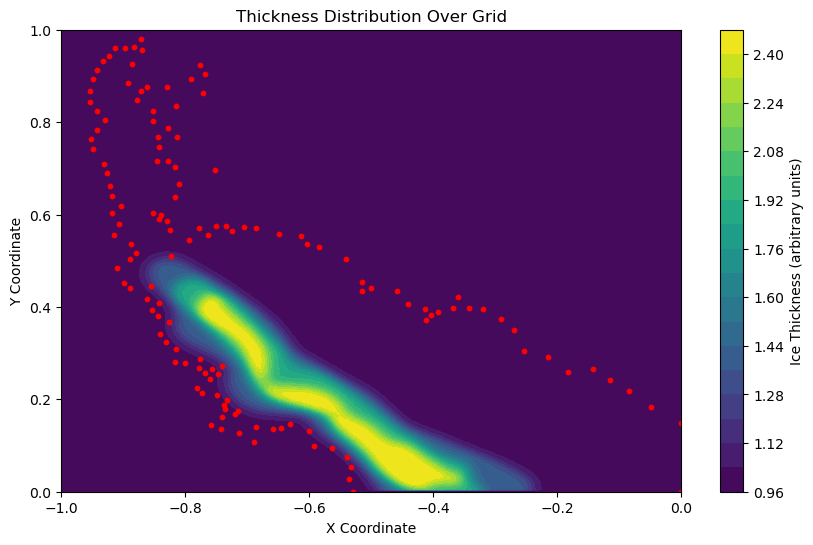

In [57]:

# Create grid for thickness map (normalized to [-1.2, 0] x [0, 1])
image_resolution = thickness_array.shape
x_grid = np.linspace(-1, 0, image_resolution[1])  # Match land geometry x domain
y_grid = np.linspace(0, 1, image_resolution[0])  # Match land geometry y domain
X, Y = np.meshgrid(x_grid, y_grid)  # Create grid for plotting

# Plot the thickness map directly
plt.figure(figsize=(10, 6))

contour = plt.contourf(X, Y, thickness_array, levels=20, cmap="viridis")  # Contour plot
plt.scatter(
    boundary_coordinates["x"], boundary_coordinates["y"], color="red", s=10, label="Points"
)
plt.colorbar(contour, label="Ice Thickness (arbitrary units)")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("Thickness Distribution Over Grid")
plt.show()

(-1.0, 0.0, 0.0, 1.0)

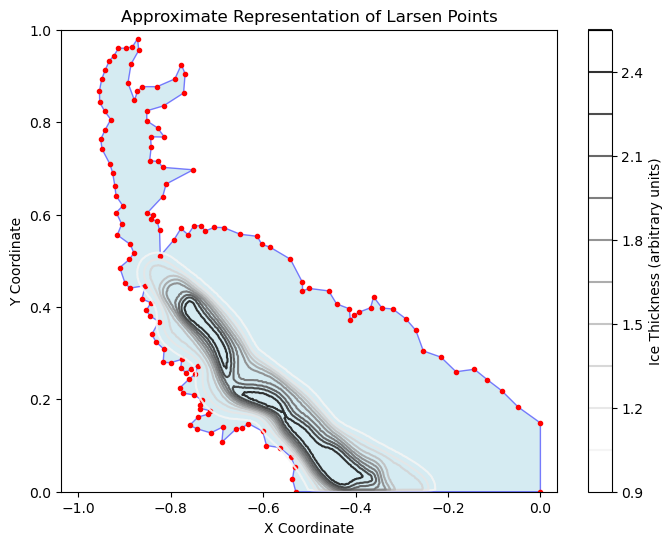

In [111]:
from matplotlib.colors import ListedColormap


polygon = Polygon(zip(x, y))

# Plot the polygon using Matplotlib
plt.figure(figsize=(8, 6))
plt.gca().add_patch(
    MplPolygon(
        list(polygon.exterior.coords),
        closed=True,
        edgecolor="blue",
        facecolor="lightblue",
        alpha=0.5,
    )
)

# Annotate the plot
plt.plot(x, y, "ro", markersize=3, label="Vertices")  # Plot the vertices
# for i, (xi, yi) in enumerate(zip(x, y)):
#     plt.text(xi - 0.02, yi, str(i), fontsize=4, ha="right", color="gray")

original_cmap = plt.cm.Grays
# original_cmap = plt.cm.coolwarm
colours = original_cmap(np.linspace(0, 1, 256))
colours[0:50, -1] = 0  # Set alpha to 0 for the first color (value 0)
transparent_cmap = ListedColormap(colours)

contour = plt.contour(
    X, Y, thickness_array, levels=10, cmap=transparent_cmap, antialiased=True, 
    alpha=0.9
)  # Contour plot

# contour = plt.contourf(
#     X, Y, thickness_array, levels=10, cmap=transparent_cmap, alpha=0.8, antialiased=True
# )  # Contour plot

plt.colorbar(contour, label="Ice Thickness (arbitrary units)")

# Formatting
plt.title("Approximate Representation of Larsen Points")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.axis("equal")

In [101]:
colours

array([[0.2298057 , 0.29871797, 0.75368315, 0.        ],
       [0.23437708, 0.30554173, 0.75967953, 0.        ],
       [0.23894846, 0.31236549, 0.7656759 , 0.        ],
       ...,
       [0.71743454, 0.05111755, 0.15873661, 1.        ],
       [0.71155385, 0.03333685, 0.15448471, 1.        ],
       [0.70567316, 0.01555616, 0.15023281, 1.        ]])

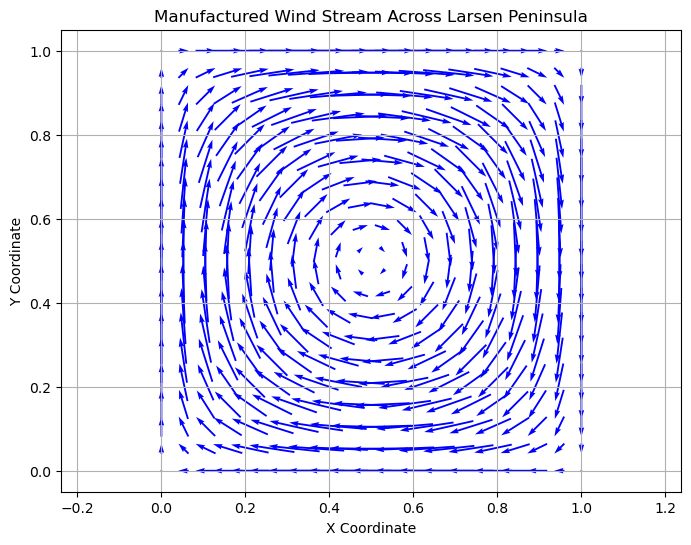

In [112]:
x = np.linspace(0, 1, 20)
y = np.linspace(0, 1, 20)
X, Y = np.meshgrid(x, y)

# Create a manufactured 2D vector field mimicking wind stream
U = -np.sin(np.pi * X) * np.cos(np.pi * Y)  # U-component (horizontal)
V = np.cos(np.pi * X) * np.sin(np.pi * Y)  # V-component (vertical)

# Plot the vector field using quiver
plt.figure(figsize=(8, 6))
plt.quiver(X, Y, U, V, color="blue", pivot="middle", scale=10, headwidth=3)
plt.title("Manufactured Wind Stream Across Larsen Peninsula")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.grid(True)
plt.axis("equal")
plt.show()

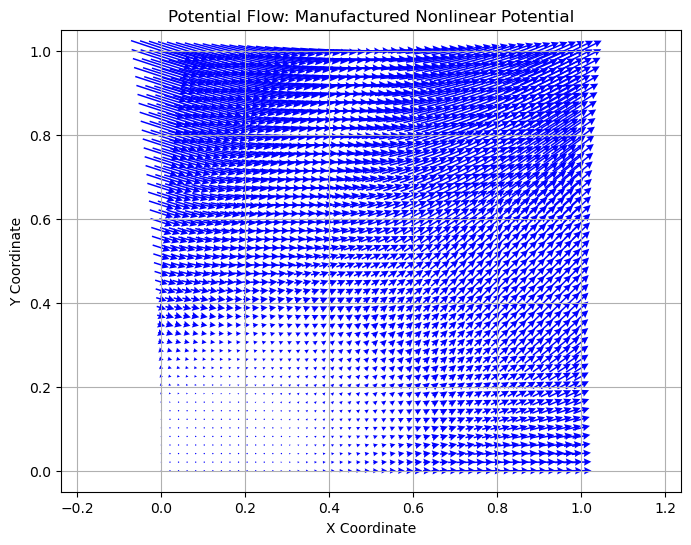

In [119]:
# Define a 2D grid for the domain [0, 1] x [0, 1]
x = np.linspace(0, 1, 50)
y = np.linspace(0, 1, 50)
X, Y = np.meshgrid(x, y)

# Define a manufactured nonlinear potential function
potential = np.sin(np.pi * X) * np.sin(2 * np.pi * Y)
potential = X**2 * Y + Y**3 - X * Y**2

# Compute the velocity field as the gradient of the potential
U, V = np.gradient(potential, x, y)

# Plot the vector field using quiver
plt.figure(figsize=(8, 6))
plt.quiver(X, Y, U, V, color="blue", pivot="middle", scale=30, headwidth=5)
plt.title("Potential Flow: Manufactured Nonlinear Potential")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.grid(True)
plt.axis("equal")
plt.show()

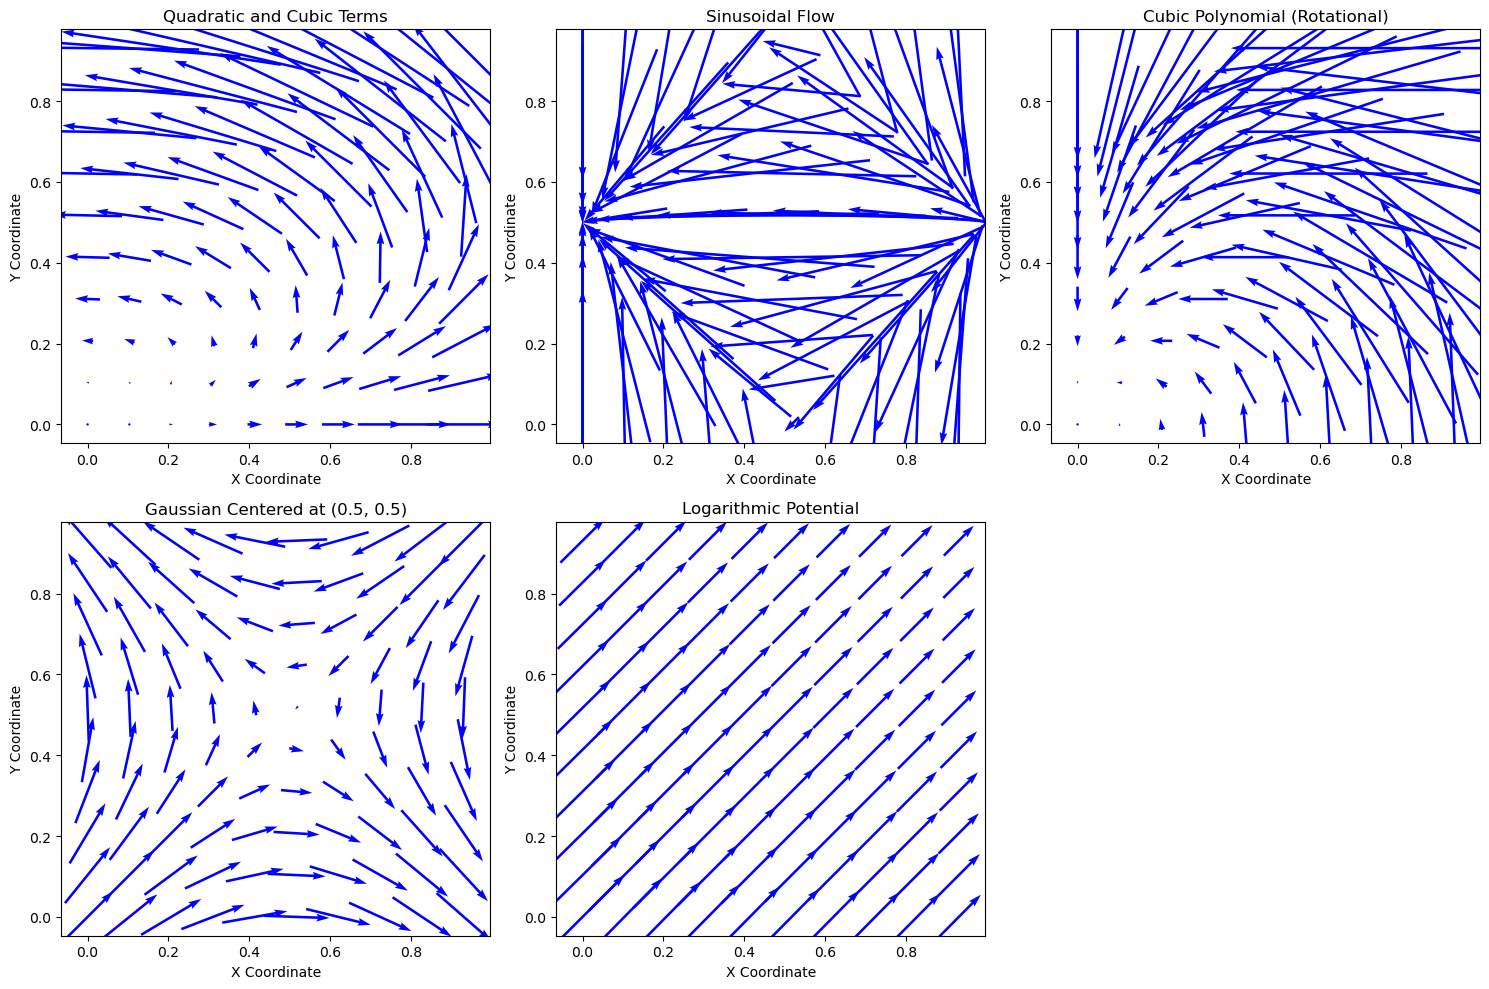

In [123]:
# Define the grid for the domain [0, 1] x [0, 1]
x = np.linspace(0, 1, 30)  # Fewer points for reduced glyphs
y = np.linspace(0, 1, 30)
X, Y = np.meshgrid(x, y)

# Define 5 qualitatively different nonlinear potential functions
potentials = [
    X**2 * Y - Y**3,  # Quadratic and cubic terms
    np.sin(np.pi * X) * np.cos(np.pi * Y),  # Sinusoidal flow
    X**3 - 3 * X * Y**2,  # Cubic polynomial (rotational)
    np.exp(-((X - 0.5) ** 2 + (Y - 0.5) ** 2)),  # Gaussian centered at (0.5, 0.5)
    np.log(1 + X + Y),  # Logarithmic potential
]

titles = [
    "Quadratic and Cubic Terms",
    "Sinusoidal Flow",
    "Cubic Polynomial (Rotational)",
    "Gaussian Centered at (0.5, 0.5)",
    "Logarithmic Potential",
]
step = 3  # Display every 5th glyph

# Plot each potential flow
plt.figure(figsize=(15, 10))
for i, potential in enumerate(potentials):
    # Compute the velocity field as the gradient of the potential
    U, V = np.gradient(potential, x, y)

    # Plot the vector field using quiver
    plt.subplot(2, 3, i + 1)
    plt.quiver(
        X[::step, ::step],
        Y[::step, ::step],
        U[::step, ::step],
        V[::step, ::step],
        color="blue",
        pivot="middle",
        scale=5,
        headwidth=3,
    )
    plt.title(titles[i])
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.axis("equal")

plt.tight_layout()
plt.show()

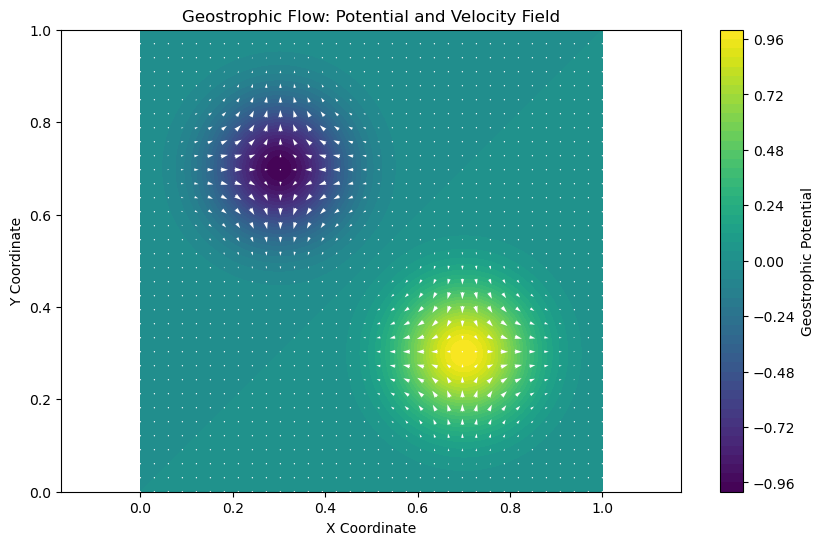

In [127]:
# Define the domain
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x, y)

# Construct a geostrophic stream function with a cyclone and an anticyclone
cyclone = -np.exp(-((X - 0.3) ** 2 + (Y - 0.7) ** 2) / 0.02)
anticyclone = np.exp(-((X - 0.7) ** 2 + (Y - 0.3) ** 2) / 0.02)
geostrophic_potential = cyclone + anticyclone

# Compute the velocity field as gradients of the geostrophic potential
# Geostrophic flow: U = -dψ/dy, V = dψ/dx
U = -np.gradient(geostrophic_potential, axis=1)
V = np.gradient(geostrophic_potential, axis=0)

# Plot the geostrophic potential
plt.figure(figsize=(10, 6))
plt.contourf(X, Y, geostrophic_potential, levels=50, cmap="viridis")
plt.colorbar(label="Geostrophic Potential")
plt.quiver(
    X[::step, ::step],
    Y[::step, ::step],
    U[::step, ::step],
    V[::step, ::step],
    color="white",
    pivot="middle",
    scale=5,
    headwidth=3,
)
plt.title("Geostrophic Flow: Potential and Velocity Field")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.axis("equal")
plt.show()

(-1.0, 0.0, 0.0, 1.0)

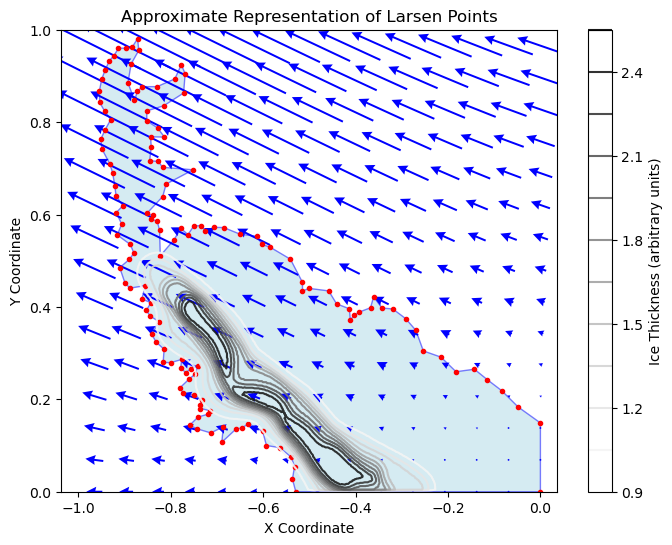

In [143]:
filename = "./src/larsen_coordinates.json"
with open(filename) as f:
    data = json.load(f)
x, y = data["x"], data["y"]

# boundary_coordinates = np.column_stack(
#     (data["x"], data["y"])
# )  # Shift to positive domain

boundary_coordinates = data

thickness_image_path = "./src/larsen_thickness_map.png"
thickness_image = Image.open(thickness_image_path).convert("L")  # Convert to grayscale
thickness_array = np.array(thickness_image)
thickness_array = thickness_array / 255  # Normalize to 0-1
thickness_array = np.flip(thickness_array, axis=0)  # Flip vertically
thickness_array = 1 / thickness_array  # Invert values

image_resolution = thickness_array.shape
x_grid = np.linspace(-1, 0, image_resolution[1])  # Match land geometry x domain
y_grid = np.linspace(0, 1, image_resolution[0])  # Match land geometry y domain
X, Y = np.meshgrid(x_grid, y_grid)  # Create grid for plotting

polygon = Polygon(zip(x, y))

# Plot the polygon using Matplotlib
plt.figure(figsize=(8, 6))
plt.gca().add_patch(
    MplPolygon(
        list(polygon.exterior.coords),
        closed=True,
        edgecolor="blue",
        facecolor="lightblue",
        alpha=0.5,
    )
)

# Annotate the plot
plt.plot(x, y, "ro", markersize=3, label="Vertices")  # Plot the vertices
# for i, (xi, yi) in enumerate(zip(x, y)):
#     plt.text(xi - 0.02, yi, str(i), fontsize=4, ha="right", color="gray")

original_cmap = plt.cm.Grays
# original_cmap = plt.cm.coolwarm
colours = original_cmap(np.linspace(0, 1, 256))
colours[0:50, -1] = 0  # Set alpha to 0 for the first color (value 0)
transparent_cmap = ListedColormap(colours)

contour = plt.contour(
    X, Y, thickness_array, levels=10, cmap=transparent_cmap, antialiased=True, alpha=0.9
)  # Contour plot

# contour = plt.contourf(
#     X, Y, thickness_array, levels=10, cmap=transparent_cmap, alpha=0.8, antialiased=True
# )  # Contour plot

plt.colorbar(contour, label="Ice Thickness (arbitrary units)")


x = np.linspace(0, -1, 30)  # Fewer points for reduced glyphs
y = np.linspace(0, 1, 30)
X, Y = np.meshgrid(x, y)
potential = X**2 * Y + Y**3 - X * Y**2

# Compute the velocity field as the gradient of the potential

U, V = np.gradient(potential, x, y)
step = 2
plt.quiver(
    X[::step, ::step],
    Y[::step, ::step],
    U[::step, ::step],
    V[::step, ::step],
    color="blue",
    pivot="middle",
    scale=30,
    headwidth=5,
)


# Formatting
plt.title("Approximate Representation of Larsen Points")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.axis("equal")